In [15]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import joblib
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os     

#time
from datetime import datetime
import time

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import dataset

In [17]:
dataset = pandas.read_csv('/content/drive/MyDrive/Project/Project Final/Dataset/Combine_60sec_Changelabel.csv')

In [18]:
print (dataset.shape)

(1009241, 27)


Head

In [19]:
print(dataset.head(20))

        ip.src      ip.dst  ip.len  ip.flags.df  ip.flags.mf  ip.fragment  \
0   3232235786  3232236810      60            1            0            0   
1   3232236810  3232235786      60            1            0            0   
2   3232235786  3232236810      52            1            0            0   
3   3232235786  3232236810     128            1            0            0   
4   3232236810  3232235786      52            1            0            0   
5   3232236810  3232235786    1119            1            0            0   
6   3232235786  3232236810      52            1            0            0   
7   3232235786  3232236810      52            1            0            0   
8   3232236810  3232235786      52            1            0            0   
9   3232235786  3232236810      52            1            0            0   
10  3232235786  3232236810      60            1            0            0   
11  3232236810  3232235786      60            1            0            0   

Descriptions

In [20]:
print(dataset.describe())

             ip.src        ip.dst        ip.len   ip.flags.df   ip.flags.mf  \
count  1.009241e+06  1.009241e+06  1.009241e+06  1.009241e+06  1.009241e+06   
mean   3.232188e+09  3.232198e+09  7.655848e+02  5.180130e-03  4.973500e-01   
std    1.246087e+07  1.285868e+07  7.308525e+02  7.178650e-02  4.999932e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.232236e+09  3.232237e+09  3.800000e+01  0.000000e+00  0.000000e+00   
50%    3.232236e+09  3.232237e+09  5.200000e+01  0.000000e+00  0.000000e+00   
75%    3.232236e+09  3.232237e+09  1.500000e+03  0.000000e+00  1.000000e+00   
max    3.232237e+09  4.294967e+09  1.500000e+03  1.000000e+00  1.000000e+00   

        ip.fragment  ip.fragment.count  ip.fragments        ip.ttl  \
count  1.009241e+06       1.009241e+06     1009241.0  1.009241e+06   
mean   2.496513e+05       9.947000e-01           0.0  6.399198e+01   
std    3.236698e+05       9.999865e-01           0.0  5.460948e-01   
min    0

Plot correlation

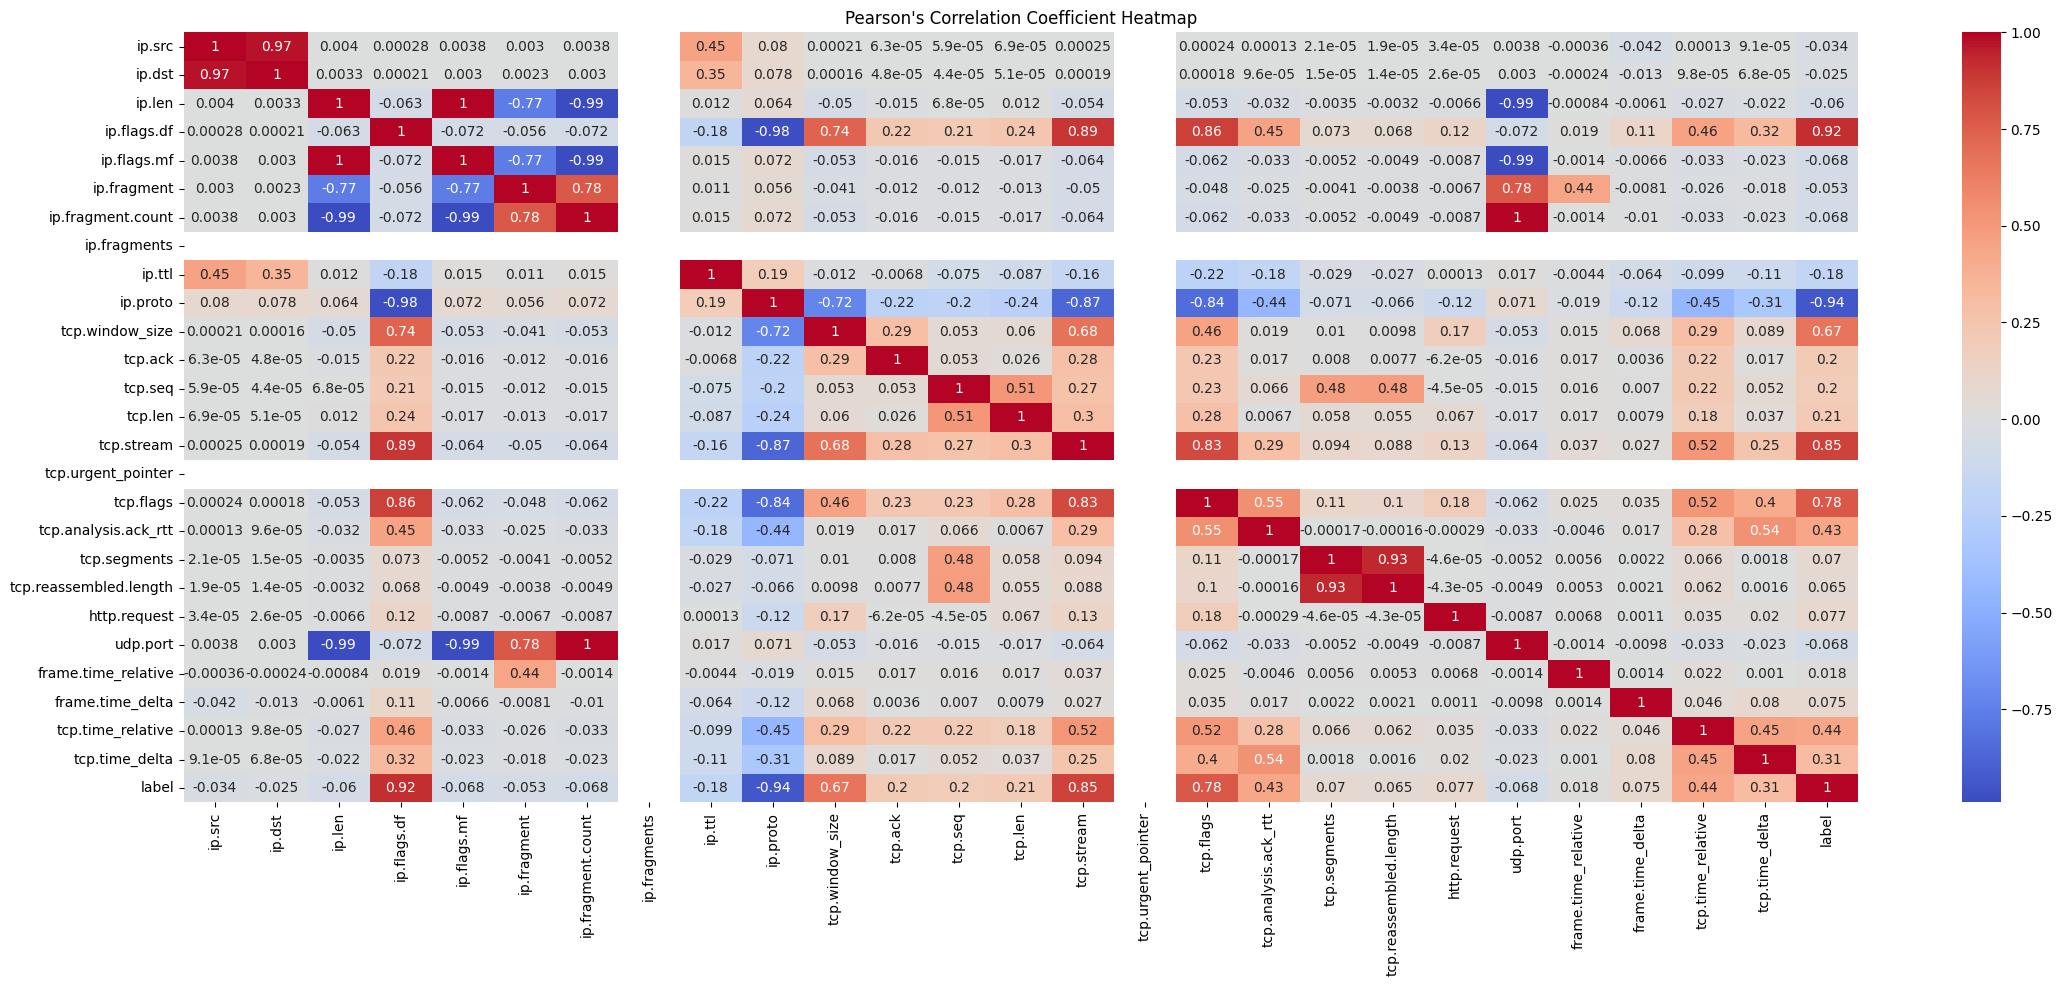

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is stored in a pandas DataFrame called 'df'

# Compute the correlation matrix
corr_matrix = dataset.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(27, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Customize the plot
plt.title("Pearson's Correlation Coefficient Heatmap")
#plt.xticks(rotation=45)
#plt.yticks(rotation=0)
plt.show()

Cut in feature

In [22]:
dataset.columns

Index(['ip.src', 'ip.dst', 'ip.len', 'ip.flags.df', 'ip.flags.mf',
       'ip.fragment', 'ip.fragment.count', 'ip.fragments', 'ip.ttl',
       'ip.proto', 'tcp.window_size', 'tcp.ack', 'tcp.seq', 'tcp.len',
       'tcp.stream', 'tcp.urgent_pointer', 'tcp.flags', 'tcp.analysis.ack_rtt',
       'tcp.segments', 'tcp.reassembled.length', 'http.request', 'udp.port',
       'frame.time_relative', 'frame.time_delta', 'tcp.time_relative',
       'tcp.time_delta', 'label'],
      dtype='object')

In [23]:
cols = ['ip.src', 'ip.dst', 'ip.len', #'ip.flags.df', 
        'ip.flags.mf','ip.fragment','ip.fragment.count', 'ip.fragments',
        #'ip.ttl', 'ip.proto', 'tcp.window_size',
        'tcp.ack', 'tcp.seq', 'tcp.len', #'tcp.stream',
        'tcp.urgent_pointer', #'tcp.flags', 'tcp.analysis.ack_rtt',
        'tcp.segments', 'tcp.reassembled.length', 'http.request', 
        'udp.port','frame.time_relative', 'frame.time_delta',
        #'tcp.time_relative', 'tcp.time_delta', 
        'label']
A = dataset[cols]

In [24]:
correlation_matrix = A.corr()

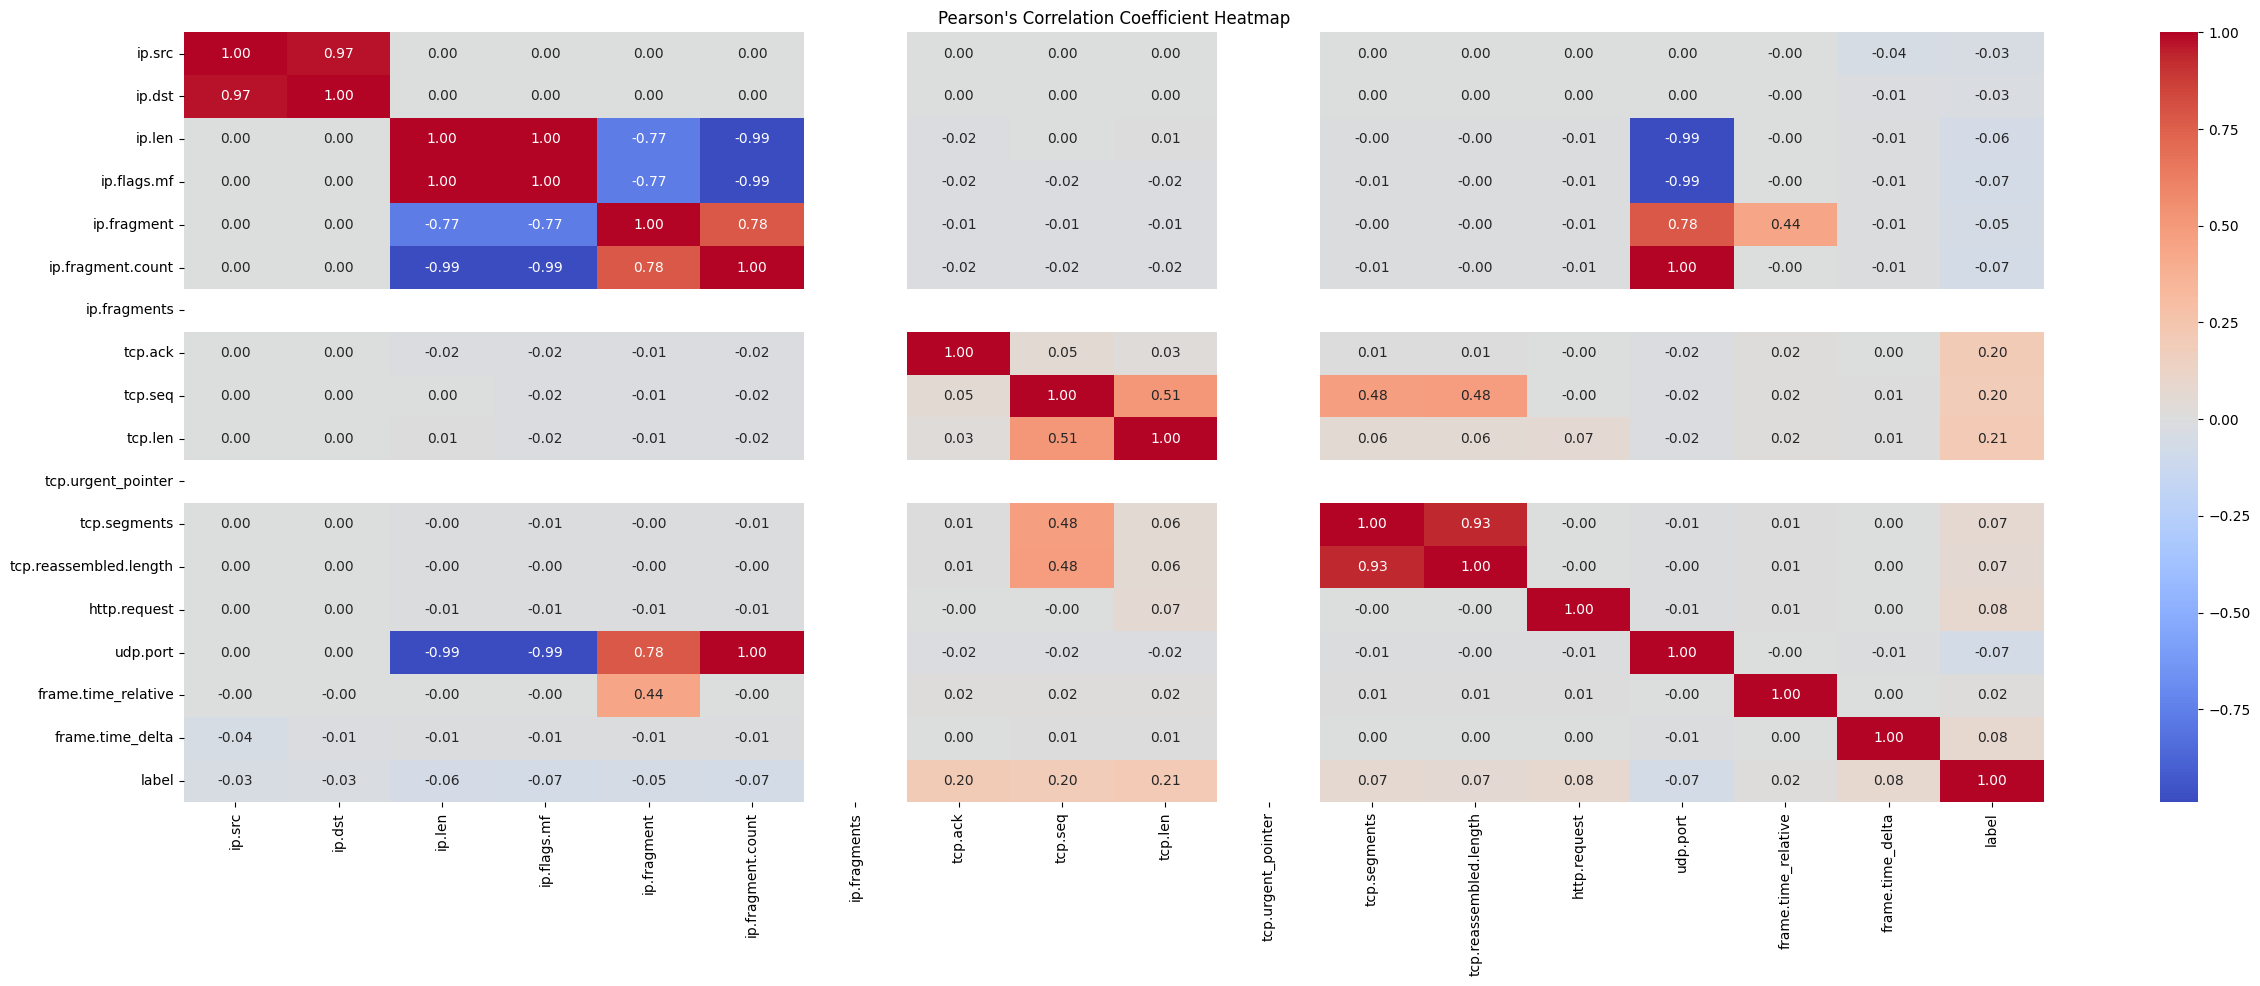

In [25]:
plt.figure(figsize=(30, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson's Correlation Coefficient Heatmap")
plt.show()

class distribution

In [26]:
print(A.groupby('label').size())

label
1        132
2    1003932
3       5049
4        128
dtype: int64


split dataset

In [27]:
# split dataset
array = A.values
print (array)
X = array[:,0:17]
Y = array[:,17]
validation_size = 0.30
seed = 42

[[3.23223579e+09 3.23223681e+09 6.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.23223681e+09 3.23223579e+09 6.00000000e+01 ... 1.72010000e-02
  1.72010000e-02 1.00000000e+00]
 [3.23223579e+09 3.23223681e+09 5.20000000e+01 ... 1.72310000e-02
  3.00000000e-05 1.00000000e+00]
 ...
 [3.23223579e+09 3.23223681e+09 8.40000000e+01 ... 5.90905800e+01
  9.81979000e-01 4.00000000e+00]
 [3.23223681e+09 3.23223579e+09 8.40000000e+01 ... 5.91046090e+01
  1.40290000e-02 4.00000000e+00]
 [3.23223578e+09 4.29496730e+09 1.12000000e+02 ... 6.21364550e+01
  3.03184600e+00 4.00000000e+00]]


In [28]:
print (X)
print (Y)

[[3.23223579e+09 3.23223681e+09 6.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.23223681e+09 3.23223579e+09 6.00000000e+01 ... 0.00000000e+00
  1.72010000e-02 1.72010000e-02]
 [3.23223579e+09 3.23223681e+09 5.20000000e+01 ... 0.00000000e+00
  1.72310000e-02 3.00000000e-05]
 ...
 [3.23223579e+09 3.23223681e+09 8.40000000e+01 ... 0.00000000e+00
  5.90905800e+01 9.81979000e-01]
 [3.23223681e+09 3.23223579e+09 8.40000000e+01 ... 0.00000000e+00
  5.91046090e+01 1.40290000e-02]
 [3.23223578e+09 4.29496730e+09 1.12000000e+02 ... 5.20000000e+02
  6.21364550e+01 3.03184600e+00]]
[1. 1. 1. ... 4. 4. 4.]


Split dataset into training set and test set

เปลี่ยนตัวแปร

In [29]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
X_train_set, X_validation, Y_train_set, Y_validation = model_selection.train_test_split(X_train, Y_train, test_size=validation_size, random_state=seed)

In [30]:
# Test options and evaluation metric
scoring = 'accuracy'

In [31]:
# Evaluating algorithm model
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ANN', MLPClassifier()))

In [32]:
# evaluate each model in turn
results = []
names = []
times = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
        start_time = time.time()
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        end_time = time.time()
        execution_time = end_time - start_time
        results.append(cv_results)
        names.append(name)
        times.append(execution_time)
        msg = "%s Accuracy: %f (+/- %f),  Processing time: %.2f seconds" % (name, cv_results.mean(), cv_results.std(), execution_time)
        print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR Accuracy: 0.994720 (+/- 0.000235),  Processing time: 135.29 seconds
CART Accuracy: 0.999936 (+/- 0.000023),  Processing time: 21.46 seconds
NB Accuracy: 0.497257 (+/- 0.001129),  Processing time: 2.96 seconds
ANN Accuracy: 0.994717 (+/- 0.000234),  Processing time: 1251.15 seconds


# LR Classification report

In [33]:
# Make predictions on validation dataset
print("\n LR results on 30% validation set \n")


 LR results on 30% validation set 



In [34]:
# Create Decision Tree classifer object
lr = LogisticRegression()

In [35]:
# Train Decision Tree Classifer
lr.fit(X_train_set, Y_train_set)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
#saving the model using joblib 
filename = 'finalized_LR_model.sav'
joblib.dump(lr, filename)

['finalized_LR_model.sav']

In [37]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_validation, Y_validation)
print (result)

0.9948948056298687


In [38]:
#Predict the response for validation dataset
predictions_rfc = lr.predict(X_validation)
print("\nLR accuracy validation: \n")
print(accuracy_score(Y_validation, predictions_rfc))
print(confusion_matrix(Y_validation, predictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_validation, predictions_rfc, target_names=target_names,digits=6))


LR accuracy validation: 

0.9948948056298687
[[     0     28      0      0]
 [     0 210858      2      0]
 [     0   1023      1      0]
 [     0     28      1      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Benign   0.000000  0.000000  0.000000        28
         Dos   0.994909  0.999991  0.997443    210860
       Probe   0.250000  0.000977  0.001946      1024
      Normal   0.000000  0.000000  0.000000        29

    accuracy                       0.994895    211941
   macro avg   0.311227  0.250242  0.249847    211941
weighted avg   0.991042  0.994895  0.992365    211941



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# Make predictions on test dataset
print("\nLR results on final 30% test \n")
newlr = LogisticRegression()
newlr.fit(X_train_set, Y_train_set)
newpredictions_rfc = newlr.predict(X_test)
print("\nLR accuracy test: \n")
print(accuracy_score(Y_test, newpredictions_rfc))
print(confusion_matrix(Y_test, newpredictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_test, newpredictions_rfc, target_names=target_names,digits=6))


LR results on final 30% test 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LR accuracy test: 

0.9947650550082074
[[     0     37      1      0]
 [     0 301188      3      1]
 [     0   1506      0      0]
 [     0     35      2      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Benign   0.000000  0.000000  0.000000        38
         Dos   0.994788  0.999987  0.997381    301192
       Probe   0.000000  0.000000  0.000000      1506
      Normal   0.000000  0.000000  0.000000        37

    accuracy                       0.994765    302773
   macro avg   0.248697  0.249997  0.249345    302773
weighted avg   0.989594  0.994765  0.992173    302773



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Cart test classification report


Make predictions on validation dataset

In [40]:
# Make predictions on validation dataset
print("\n CART results on 30% validation set \n")


 CART results on 30% validation set 



In [41]:
# Create Decision Tree classifer object
cart = DecisionTreeClassifier()

In [42]:
# Train Decision Tree Classifer
cart.fit(X_train_set, Y_train_set)

DecisionTreeClassifier()

In [43]:
#saving the model using joblib 
filename = 'finalized_CART_model.sav'
joblib.dump(cart, filename)

['finalized_CART_model.sav']

In [44]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_validation, Y_validation)
print (result)

0.9999245072921238


In [45]:
#Predict the response for test dataset
predictions_rfc = cart.predict(X_validation)
print("\nCART accuracy validation: \n")
print(accuracy_score(Y_validation, predictions_rfc))
print(confusion_matrix(Y_validation, predictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_validation, predictions_rfc, target_names=target_names,digits=6))


CART accuracy validation: 

0.9999245072921238
[[    22      0      6      0]
 [     0 210858      2      0]
 [     5      0   1018      1]
 [     0      0      2     27]]
              precision    recall  f1-score   support

      Benign   0.814815  0.785714  0.800000        28
         Dos   1.000000  0.999991  0.999995    210860
       Probe   0.990272  0.994141  0.992203      1024
      Normal   0.964286  0.931034  0.947368        29

    accuracy                       0.999925    211941
   macro avg   0.942343  0.927720  0.934892    211941
weighted avg   0.999924  0.999925  0.999924    211941



In [46]:
# Make predictions on test dataset
print("\nCART results on final 30% test \n")
newcart = DecisionTreeClassifier()
newcart.fit(X_train_set, Y_train_set)
newpredictions_rfc = newcart.predict(X_test)
print("\nCART accuracy test: \n")
print(accuracy_score(Y_test, newpredictions_rfc))
print(confusion_matrix(Y_test, newpredictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_test, newpredictions_rfc, target_names=target_names,digits=6))


CART results on final 30% test 


CART accuracy test: 

0.9999042186720745
[[    24      0     12      2]
 [     0 301191      1      0]
 [     8      2   1496      0]
 [     0      1      3     33]]
              precision    recall  f1-score   support

      Benign   0.750000  0.631579  0.685714        38
         Dos   0.999990  0.999997  0.999993    301192
       Probe   0.989418  0.993360  0.991385      1506
      Normal   0.942857  0.891892  0.916667        37

    accuracy                       0.999904    302773
   macro avg   0.920566  0.879207  0.898440    302773
weighted avg   0.999899  0.999904  0.999901    302773



# NB Classification report

In [47]:
# Make predictions on validation dataset
print("\n NB results on 30% validation set \n")


 NB results on 30% validation set 



In [48]:
# Create Decision Tree classifer object
nb = GaussianNB()

In [49]:
# Train Decision Tree Classifer
nb.fit(X_train_set, Y_train_set)

GaussianNB()

In [50]:
#saving the model using joblib 
filename = 'finalized_NB_model.sav'
joblib.dump(nb, filename)

['finalized_NB_model.sav']

In [51]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_validation, Y_validation)
print (result)

0.4963739908748189


In [52]:
#Predict the response for validation dataset
predictions_rfc = nb.predict(X_validation)
print("\nNB accuracy validation: \n")
print(accuracy_score(Y_validation, predictions_rfc))
print(confusion_matrix(Y_validation, predictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_validation, predictions_rfc, target_names=target_names,digits=6))


NB accuracy validation: 

0.4963739908748189
[[    28      0      0      0]
 [105742 105115      0      3]
 [   963      2     58      1]
 [    28      0      0      1]]
              precision    recall  f1-score   support

      Benign   0.000262  1.000000  0.000524        28
         Dos   0.999981  0.498506  0.665333    210860
       Probe   1.000000  0.056641  0.107209      1024
      Normal   0.200000  0.034483  0.058824        29

    accuracy                       0.496374    211941
   macro avg   0.550061  0.397407  0.207973    211941
weighted avg   0.999740  0.496374  0.662466    211941



In [53]:
# Make predictions on test dataset
print("\nNB results on final 30% test \n")
newnb = GaussianNB()
newnb.fit(X_train_set, Y_train_set)
newpredictions_rfc = newnb.predict(X_test)
print("\nNB accuracy test: \n")
print(accuracy_score(Y_test, newpredictions_rfc))
print(confusion_matrix(Y_test, newpredictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_test, newpredictions_rfc, target_names=target_names,digits=6))


NB results on final 30% test 


NB accuracy test: 

0.499099985797941
[[    36      0      0      2]
 [150214 150974      0      4]
 [  1400      6    100      0]
 [    33      0      0      4]]
              precision    recall  f1-score   support

      Benign   0.000237  0.947368  0.000475        38
         Dos   0.999960  0.501255  0.667772    301192
       Probe   1.000000  0.066401  0.124533      1506
      Normal   0.400000  0.108108  0.170213        37

    accuracy                       0.499100    302773
   macro avg   0.600049  0.405783  0.240748    302773
weighted avg   0.999762  0.499100  0.664926    302773



# ANN Classification report

In [54]:
# Make predictions on validation dataset
print("\n ANN results on 30% validation set \n")


 ANN results on 30% validation set 



In [55]:
# Create Decision Tree classifer object
ann = MLPClassifier()

In [56]:
# Train Decision Tree Classifer
ann.fit(X_train_set, Y_train_set)

MLPClassifier()

In [57]:
#saving the model using joblib 
filename = 'finalized_ANN_model.sav'
joblib.dump(ann, filename)

['finalized_ANN_model.sav']

In [58]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_validation, Y_validation)
print (result)

0.994899523924111


In [59]:
#Predict the response for validation dataset
predictions_rfc = ann.predict(X_validation)
print("\nANN accuracy validation: \n")
print(accuracy_score(Y_validation, predictions_rfc))
print(confusion_matrix(Y_validation, predictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_validation, predictions_rfc, target_names=target_names,digits=6))


ANN accuracy validation: 

0.994899523924111
[[     0     28      0      0]
 [     0 210860      0      0]
 [     0   1024      0      0]
 [     0     29      0      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Benign   0.000000  0.000000  0.000000        28
         Dos   0.994900  1.000000  0.997443    210860
       Probe   0.000000  0.000000  0.000000      1024
      Normal   0.000000  0.000000  0.000000        29

    accuracy                       0.994900    211941
   macro avg   0.248725  0.250000  0.249361    211941
weighted avg   0.989825  0.994900  0.992356    211941



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
# Make predictions on test dataset
print("\nANN results on final 30% test \n")
newann = MLPClassifier()
newann.fit(X_train_set, Y_train_set)
newpredictions_rfc = newann.predict(X_test)
print("\nANN accuracy test: \n")
print(accuracy_score(Y_test, newpredictions_rfc))
print(confusion_matrix(Y_test, newpredictions_rfc))
target_names = ['Benign', 'Dos', 'Probe', 'Normal']
print(classification_report(Y_test, newpredictions_rfc, target_names=target_names,digits=6))


ANN results on final 30% test 


ANN accuracy test: 

0.9947848718346748
[[     0     37      0      1]
 [     0 301192      0      0]
 [     0   1506      0      0]
 [     0     35      0      2]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Benign   0.000000  0.000000  0.000000        38
         Dos   0.994788  1.000000  0.997387    301192
       Probe   0.000000  0.000000  0.000000      1506
      Normal   0.666667  0.054054  0.100000        37

    accuracy                       0.994785    302773
   macro avg   0.415364  0.263514  0.274347    302773
weighted avg   0.989675  0.994785  0.992191    302773



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
